In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('body_type_merged_data.csv')
data.head()

,bust,hips,waist,height,gender
0,8,8,7,24,female
1,8,19,14,63,female
2,9,20,17,49,female
3,9,45,41,60,female
4,10,11,9,46,female


In [7]:
import numpy as np

# Calculate ratios
data['whr'] = data['waist'] / data['hips']
data['bhr'] = data['bust'] / data['hips']

def assign_body_type(row):
    bust, waist, hips = row['bust'], row['waist'], row['hips']
    whr = row['whr']
    bhr = row['bhr']
    
    # Hourglass
    if abs(bust - hips) <= 3 and waist <= 0.75 * min(bust, hips):
        return "Hourglass"
    # Pear
    elif hips > bust * 1.05:
        return "Pear"
    # Inverted Triangle
    elif bust > hips * 1.05:
        return "Inverted Triangle"
    # Apple
    elif waist >= bust or waist >= hips:
        return "Apple"
    # Rectangle
    else:
        return "Rectangle"

data['body_type'] = data.apply(assign_body_type, axis=1)


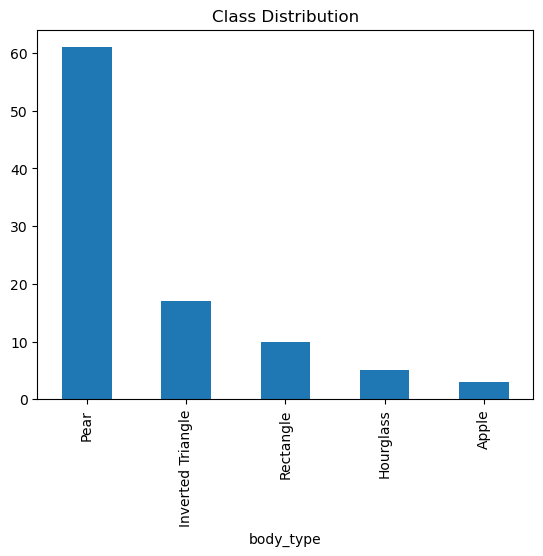

In [9]:
data['body_type'].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

In [11]:
data.to_csv('ml_data.csv', index=False)